# Twitter Sentiment Analysis- A NLP Use-Case

# Project Pipeline
 The various steps involved in the Machine Learning Pipeline are :

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Target Variables
- Data Preprocessing
- Splitting our data into Train and Test Subset
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building
- Conclusion


## Step-1: Import Necessary Dependencies

In [1]:
# utilities
import numpy as np
import pandas as pd
import re
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# warnings 
import warnings
warnings.filterwarnings('ignore')

## Step-2: Read and Load Dataset

In [2]:
# importing dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING='ISO-8859-1'
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
411770,0,2060194782,Sat Jun 06 18:26:32 PDT 2009,NO_QUERY,nadialopez,#jonaskevin i think he 4got 2 come #jonaskevi...
499304,0,2186482515,Mon Jun 15 18:54:16 PDT 2009,NO_QUERY,babiinap,if you could see that i'm the one who understa...
130293,0,1835283780,Mon May 18 05:37:19 PDT 2009,NO_QUERY,aybbelle,I am awake. Enough said.
224201,0,1977362732,Sat May 30 20:48:39 PDT 2009,NO_QUERY,irnidotnet,Well I did attend the wedding and one of the b...
920121,4,1753936842,Sun May 10 04:12:48 PDT 2009,NO_QUERY,jemjem1983,@delicateone oh I see. Flat packed David LOL c...


## Step-3: Exploratory Data Analysis

### 3.1: Top 5 records of dataset

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### 3.2: Columns/Features in dataset

In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

### 3.3: Length of dataset

In [5]:
len(df)

1600000

### 3.4: Shape of data

In [6]:
df.shape

(1600000, 6)

### 3.5: Data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### 3.6: Datatypes of all columns

In [8]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

### 3.7: Checking for Null Values

In [9]:
np.sum(df.isna().any(axis=1))

0

### 3.8: Rows and Columns in dataset

In [10]:
print(f"Count of columns in dataset is {df.shape[1]}")
print(f"Count of rows in dataset is {len(df)}")

Count of columns in dataset is 6
Count of rows in dataset is 1600000


### 3.9: Check Unique targer values

In [11]:
df['target'].unique()

array([0, 4], dtype=int64)

### 3.10: Check number of target values

In [12]:
df['target'].nunique()

2

## Step-4: Data Visualization of target variables

<Figure size 1080x504 with 0 Axes>

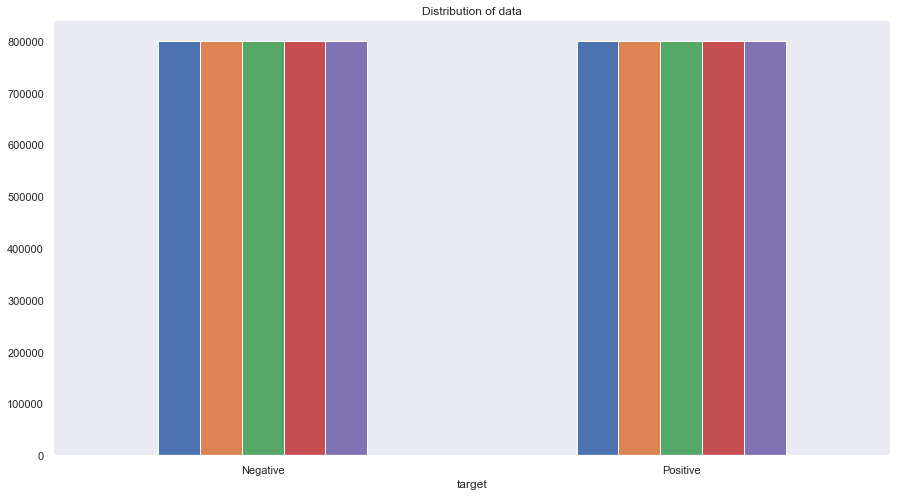

In [45]:
# getting the number of positive and negative tweets
df['target'].value_counts()
# Plotting the distribution for dataset.
plt.figure(figsize=(15,7))
ax=df.groupby('target').count().plot(kind='bar',title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
plt.show()
# # Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

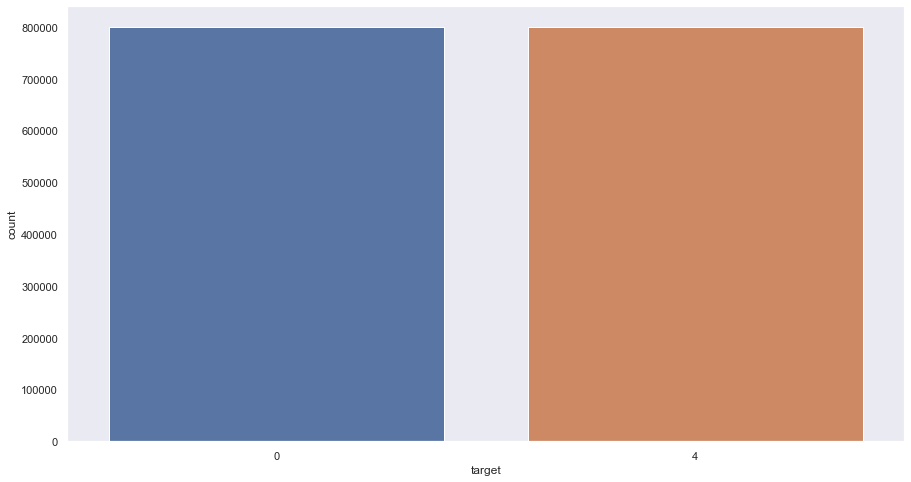

In [17]:
sns.set(style='dark',rc={'figure.figsize':(15,8)})
sns.countplot(df['target'])
plt.show()

## Step-5: Data Preprocessing

 ### 5.1: Select target and text columns for further analysis

In [18]:
data=df[['target','text']]

### 5.2: Replacing the values for easy understanding. (Assigning 1 to positive sentiment 4)

In [19]:
data['target']=data['target'].replace(4,1)

### 5.3: Print values of target variables

In [20]:
data['target'].unique()

array([0, 1], dtype=int64)

### 5.4: Separating positive and negative tweets

In [21]:
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

### 5.5: Taking one fourth so that we can run on our machine easily

In [22]:
data_pos=data_pos.iloc[:20000]
data_neg=data_neg.iloc[:20000]

### 5.6: Combining positive and negative tweets

In [23]:
dataset=pd.concat([data_pos,data_neg])

### 5.7: Making text in lower case

In [24]:
dataset['text']=dataset['text'].str.lower()
dataset.tail()

,target,text
19995,0,"not much time off this weekend, work trip to m..."
19996,0,one more day of holidays
19997,0,feeling so down right now .. i hate you damn h...
19998,0,"geez,i hv to read the whole book of personalit..."
19999,0,i threw my sign at donnie and he bent over to ...


### 5.8: Defining set of all stopwords in english

In [25]:
stopwords=set(nltk.corpus.stopwords.words('english'))

In [26]:
len(stopwords)

179

### 5.9: Cleaning and removing above stop words list from the tweet text

In [27]:
def cleaning_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopwords])
dataset['text']=dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset.head()

,target,text
800000,1,love @health4uandpets u guys r best!!
800001,1,im meeting one besties tonight! cant wait!! - ...
800002,1,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,1,sick really cheap hurts much eat real food plu...
800004,1,@lovesbrooklyn2 effect everyone


### 5.10: Cleaning and removing punctuations

In [28]:
import string
english_punctuations=string.punctuation
def cleaning_punctuations(text):
    translator=str.maketrans("","",english_punctuations)
    text=text.translate(translator)
    return text
dataset['text']=dataset['text'].apply(lambda text:cleaning_punctuations(text))
dataset.tail()

,target,text
19995,0,much time weekend work trip malmï¿½ frisat tod...
19996,0,one day holidays
19997,0,feeling right hate damn humprey
19998,0,geezi hv read whole book personality types emb...
19999,0,threw sign donnie bent get thingee made sad face


### 5.11: Cleaning and removing repeating characters

In [29]:
def cleaning_repeating_chars(text):
    return re.sub(r'(.)\1+',r'\1',text)
dataset['text']=dataset['text'].apply(lambda x: cleaning_repeating_chars(x))

In [30]:
dataset.tail()

,target,text
19995,0,much time wekend work trip malmï¿½ frisat toda...
19996,0,one day holidays
19997,0,feling right hate damn humprey
19998,0,gezi hv read whole bok personality types embar...
19999,0,threw sign donie bent get thinge made sad face


### 5.12: Cleaning and removing URL's

In [34]:
def cleaning_URLs(data):
    return re.sub(r'((www\.)|(https?)://\w+)','',data)
dataset['text']=dataset['text'].apply(lambda text:cleaning_URLs(text))
dataset.tail()

,target,text
19995,0,much time wekend work trip malmï¿½ frisat toda...
19996,0,one day holidays
19997,0,feling right hate damn humprey
19998,0,gezi hv read whole bok personality types embar...
19999,0,threw sign donie bent get thinge made sad face


### 5.13: Cleaning and removing Numeric numbers

In [35]:
def cleaning_numbers(data):
    return re.sub(r'[0-9]+','',data)
dataset['text']=dataset['text'].apply(lambda text:cleaning_numbers(text))
dataset.tail()

,target,text
19995,0,much time wekend work trip malmï¿½ frisat toda...
19996,0,one day holidays
19997,0,feling right hate damn humprey
19998,0,gezi hv read whole bok personality types embar...
19999,0,threw sign donie bent get thinge made sad face


### 5.14 Getting tokenization of tweets

In [36]:
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
dataset['text']=dataset['text'].apply(tokenizer.tokenize)
dataset.head()

,target,text
800000,1,"[love, healthuandpets, u, guys, r, best]"
800001,1,"[im, meting, one, besties, tonight, cant, wait..."
800002,1,"[darealsunisakim, thanks, twiter, ad, sunisa, ..."
800003,1,"[sick, realy, cheap, hurts, much, eat, real, f..."
800004,1,"[lovesbroklyn, efect, everyone]"


### 5.15: Applying Stemming

In [37]:
ps=nltk.PorterStemmer()
def stemming_on_text(text):
    return [ps.stem(word) for word in text]
dataset['text']=dataset['text'].apply(lambda text:stemming_on_text(text))
dataset.head()

,target,text
800000,1,"[love, healthuandpet, u, guy, r, best]"
800001,1,"[im, mete, one, besti, tonight, cant, wait, gi..."
800002,1,"[darealsunisakim, thank, twiter, ad, sunisa, g..."
800003,1,"[sick, reali, cheap, hurt, much, eat, real, fo..."
800004,1,"[lovesbroklyn, efect, everyon]"


### 5.16: Applying Lemmatizer

In [38]:
wn=WordNetLemmatizer()
def lemmatization_on_text(text):
    return [wn.lemmatize(word) for word in text]
dataset['text']=dataset['text'].apply(lambda text:lemmatization_on_text(text))
dataset.head()

,target,text
800000,1,"[love, healthuandpet, u, guy, r, best]"
800001,1,"[im, mete, one, besti, tonight, cant, wait, gi..."
800002,1,"[darealsunisakim, thank, twiter, ad, sunisa, g..."
800003,1,"[sick, reali, cheap, hurt, much, eat, real, fo..."
800004,1,"[lovesbroklyn, efect, everyon]"


### 5.17: Separating input feature and label

In [39]:
X,y=data.text,data.target

### 5.18: Plot a cloud of words for negative tweets

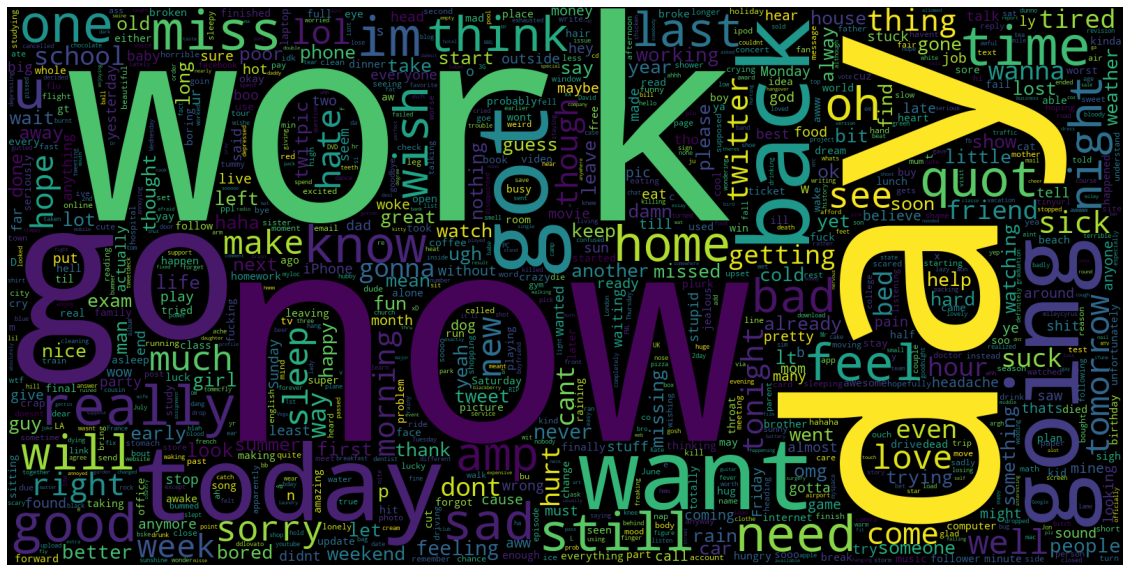

In [40]:
data_neg=data['text'][:800000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,collocations=False).generate(''.join(data_neg))
plt.axis('off')
plt.imshow(wc)

### 5.19: Plot a cloud of words for positive tweets

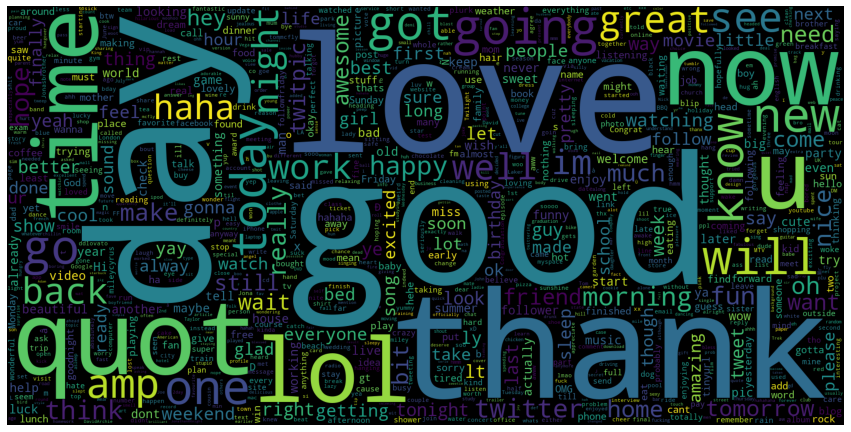

In [41]:
data_pos=data['text'][800000:]
wc=WordCloud(height=800,width=1600,max_words=1000,collocations=False).generate(''.join(data_pos))
plt.axis("off")
plt.imshow(wc)

## Step-6: Splitting our Data into Train and Test Subset

In [42]:
# Separating 95% data for training data and 5% data for testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=23)

## Step-7: Transform data using TF-IDF Vectorizer

### 7.1: Fit the TF-IDF Vectorizer

In [43]:
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectorizer.fit(X_train)
print(f"No. of Feature Words: {len(vectorizer.get_feature_names())}")

No. of Feature Words: 500000


In [44]:
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

## Step-8: Function for Model Evaluation

#### Afrer training the model we then apply evaluation measures to check how model is performing. Accordingly we use the following evaluation parameters to check the performance of the model respectively:
- Accuracy Score
- Confusion Matrix with plot
- ROC-AUC Curve

In [50]:
def evaluate_model(model):
    # Predict values for test dataset
    y_pred=model.predict(X_test)
    # Print evaluation metrics for test dataset
    print(classification_report(y_test,y_pred))
    # Compute plot for confusion matrix
    cf_matrix=confusion_matrix(y_test,y_pred)
    catagories=['Negative','Positive']
    group_names=['True Neg','False Pos','False Neg','True Pos']
    group_percentages=['{:.2f}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels=[f'{v1}\n{v2}' for v1,v2 in zip(group_names,group_percentages)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix,annot=labels,cmap="Blues",xticklabels=catagories,yticklabels=catagories,fmt='')
    plt.xlabel("Predicted Values",fontdict={'size':14},labelpad=10)
    plt.ylabel("Actual Values", fontdict={'size':14}, labelpad=10)
    plt.title("Confusion Matrix", pad=20, fontdict={'size':14})
    plt.show()

## Step-9: Model Building

#### In the problem statement we have used three different models respectively :
- Bernoulli Naive Bayes
- SVM (Support Vector Machine)
- Logistic Regression
#### The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

### 9.1: Model-1

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40070
           1       0.80      0.81      0.80     39930

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



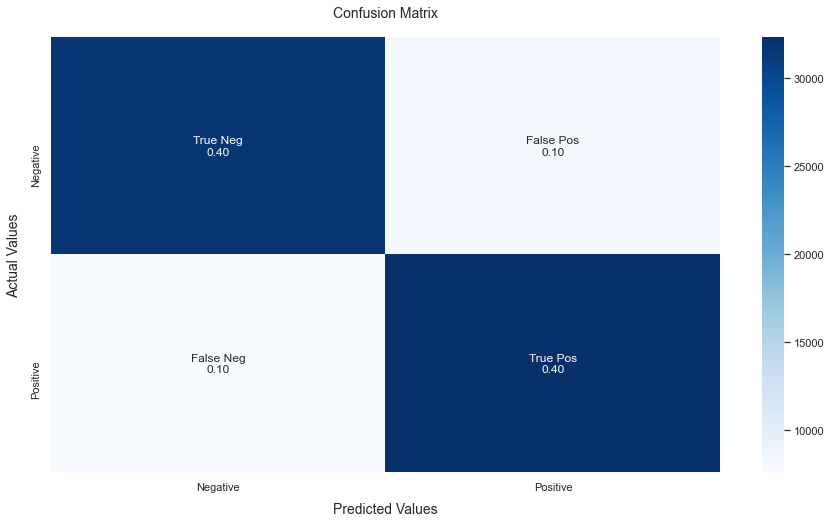

In [51]:
BNBModel=BernoulliNB()
BNBModel.fit(X_train,y_train)
evaluate_model(BNBModel)
y_pred1=BNBModel.predict(X_test)

### 9.2: Plot of ROC-AUC curve for model-1

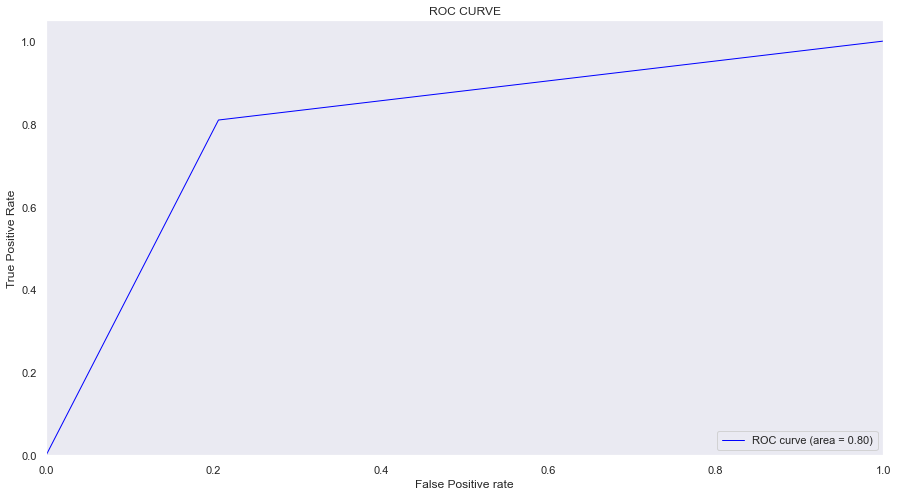

In [54]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test,y_pred1)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot(fpr,tpr,color='blue',lw=1,label="ROC curve (area = {:.2f})".format(roc_auc))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.show()

### 9.3: Model-2

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     40070
           1       0.81      0.82      0.82     39930

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



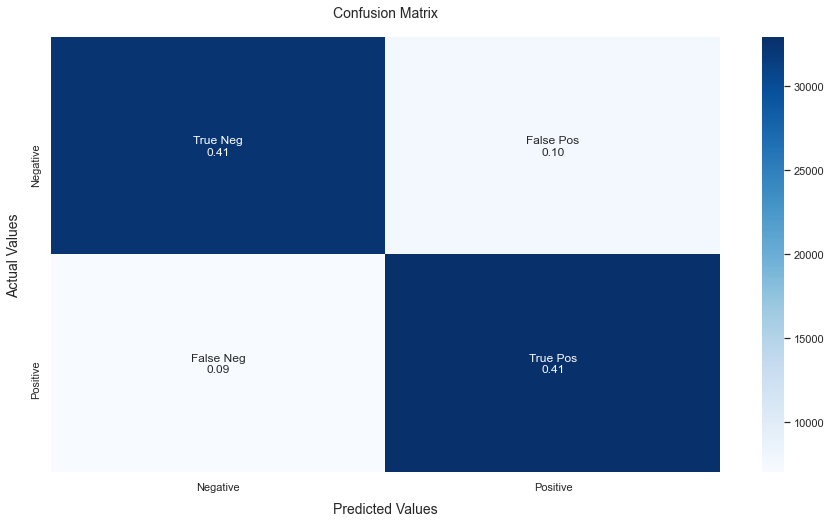

In [57]:
SVCModel=LinearSVC()
SVCModel.fit(X_train,y_train)
evaluate_model(SVCModel)
y_pred2=SVCModel.predict(X_test)

### 9.4: Plot of ROC-AUC curve for model-2

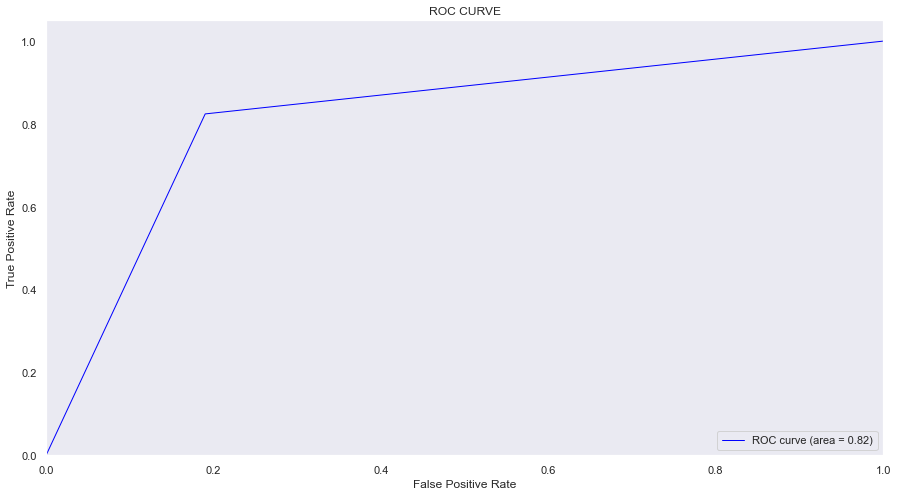

In [58]:
fpr, tpr, threshold = roc_curve(y_test,y_pred2)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot(fpr,tpr,color='blue',lw=1,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.show()

### 9.5: Model-3

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40070
           1       0.82      0.83      0.82     39930

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



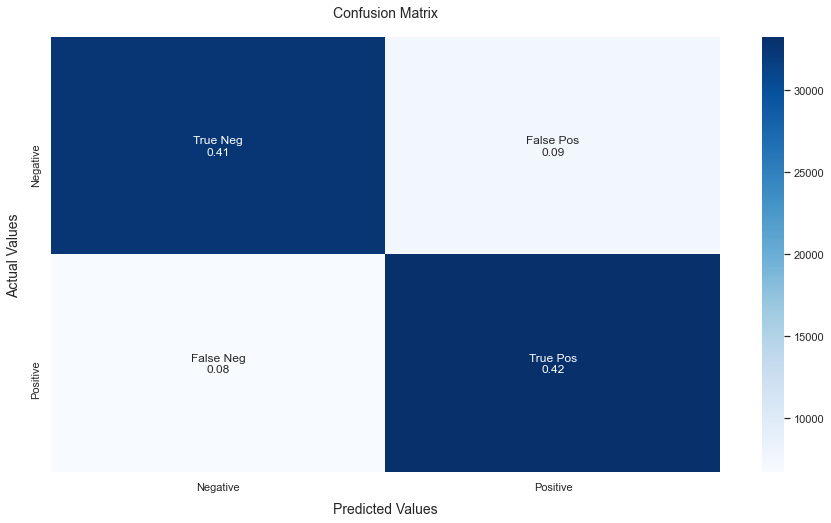

In [63]:
LRModel=LogisticRegression()
LRModel.fit(X_train,y_train)
evaluate_model(LRModel)
y_pred3=LRModel.predict(X_test)

### 9.6: Plot of ROC-AUC curve for model-3

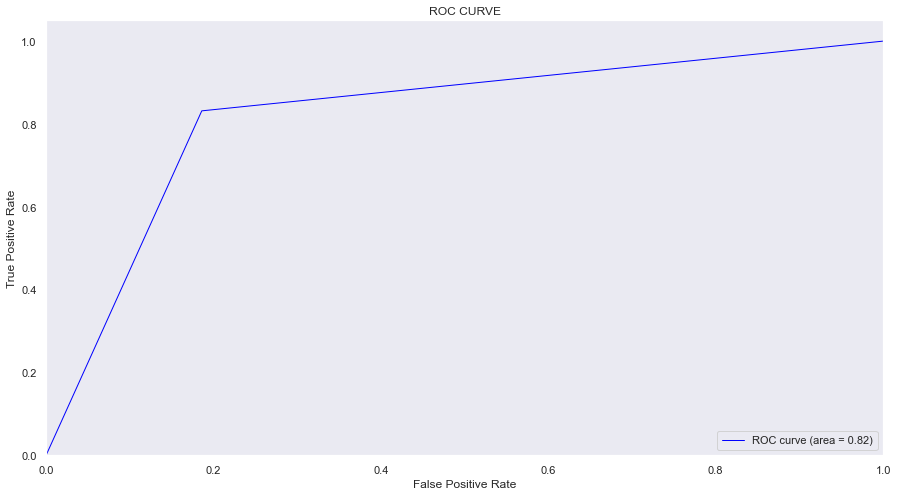

In [64]:
fpr, tpr, threshold = roc_curve(y_test,y_pred3)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot(fpr,tpr,color='blue',lw=1,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.show()

## Step 10: Conclusion

Upon evaluating all the models we can conclude the following details i.e.

- Accuracy: As far as the accuracy of the model is concerned Logistic Regression performs better than SVM which in turn performs better than Bernoulli Naive Bayes.

- F1-score: The F1 Scores for class 0 and class 1 are :
    (a) For class 0: Bernoulli Naive Bayes(accuracy = 0.80) < SVM (accuracy =0.82) <= Logistic Regression (accuracy = 0.82)
    (b) For class 1: Bernoulli Naive Bayes (accuracy = 0.80) < SVM (accuracy = 0.82) <= Logistic Regression (accuracy = 0.82)

- AUC Score: Bernoulli Naive Bayes(accuracy = 0.80) < SVM (accuracy =0.82) <= Logistic Regression (accuracy = 0.82)

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression is following the principle of Occam’s Razor which defines that for a particular problem statement if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model, therefore the concept holds true for the above-mentioned dataset.